In [2]:
import pandas as pd

# Загрузка датасета
data = pd.read_csv('msg.csv', delimiter=';', encoding='utf-8')
data['Текст'] = data['Текст'].astype(str)
data['Дата'] = pd.to_datetime(data['Дата'])
data['ID']=data['ID'].astype(int)
data

,ID,Текст,Дата,Пользователь (имя)
0,19896,Если есть 14 то надо ли со взрослым?,2023-03-31 21:41:00,Андрей Балконский
1,19895,Ага,2023-03-31 17:21:00,Полина Петухова
2,19892,"У меня завтра две группы с 9,00 и в 10,30",2023-03-31 15:17:00,Полина Петухова
3,19891,Првиет,2023-03-31 15:17:00,Полина Петухова
4,19889,Здравствуйте! А у Алины завтра нет тренировки ...,2023-03-30 21:05:00,Елизавета Фетисова
...,...,...,...,...
8592,2552,сколько будет стоить?,2018-03-01 18:27:00,Ангелина Еремян
8593,2550,"Здравствуйте , можно через интернет оплатить в...",2018-03-01 18:26:00,Ангелина Еремян
8594,2549,Спасибо. Записались,2018-02-01 22:57:00,Танюшка Чернохаева
8595,2547,Добрый вечер! С наступившим!!!! К Вам можно пр...,2018-01-01 17:28:00,Танюшка Чернохаева


In [3]:
# Подсчет уникальных диалогов
count_unique_user_names = data['Пользователь (имя)'].nunique()
print(count_unique_user_names)


1588


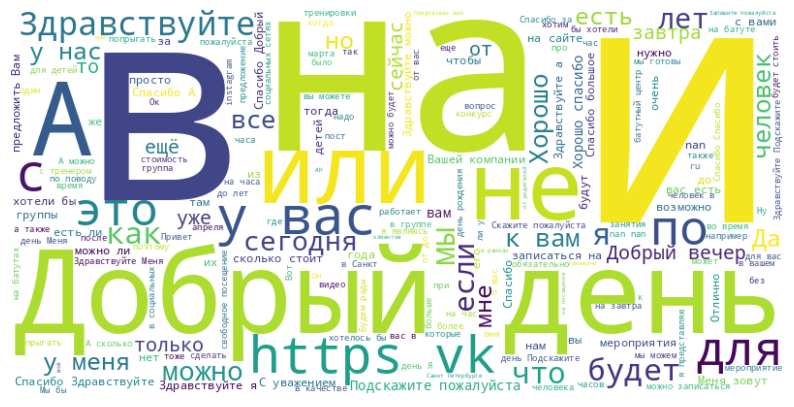

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Объединение всех текстовых данных в одну строку
text = ' '.join(data['Текст'])

# Создание объекта WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Отображение облака слов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

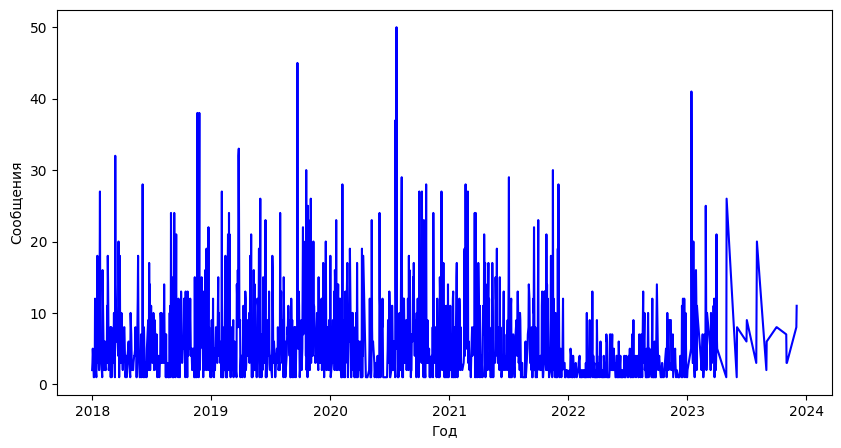

In [ ]:
data['Дата'] = pd.to_datetime(data['Дата'],
                                   errors='coerce')
data['Год'] = data['Дата'].dt.year
data['Дата'] = data['Дата'].dt.date

data.groupby('Дата')['Текст'].count().plot(kind='line', color='blue', figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Сообщения')
plt.show()

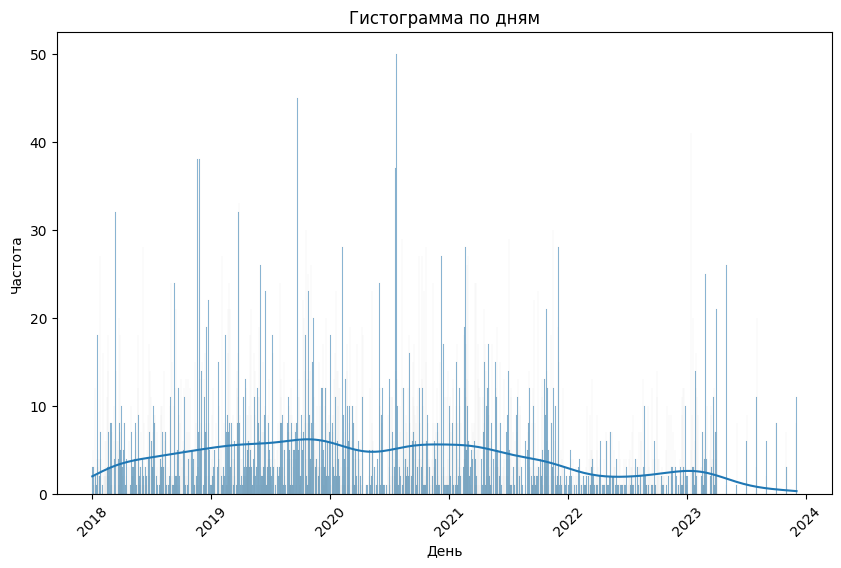

In [ ]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Извлечение дня из столбца "Дата и время"
data['День'] = data['Дата'].dt.date

# Создание графика с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='День', binwidth=1, kde=True)  # Добавление параметра kde=True для графика огибающей

# Настройка заголовка и осей графика
plt.title('Гистограмма по дням')
plt.xlabel('День')
plt.ylabel('Частота')

# Поворот подписей оси X для лучшей читаемости
plt.xticks(rotation=45)

# Отображение графика
plt.show()


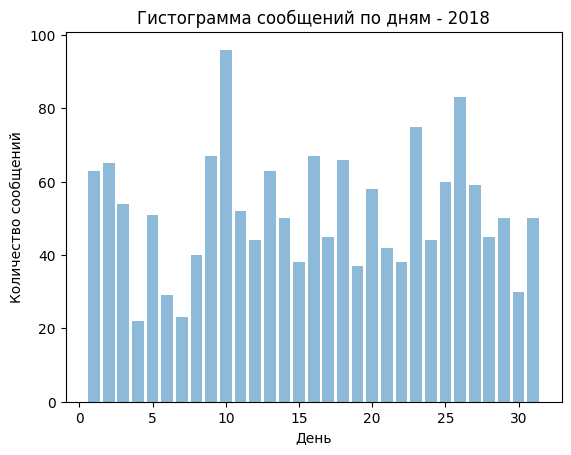

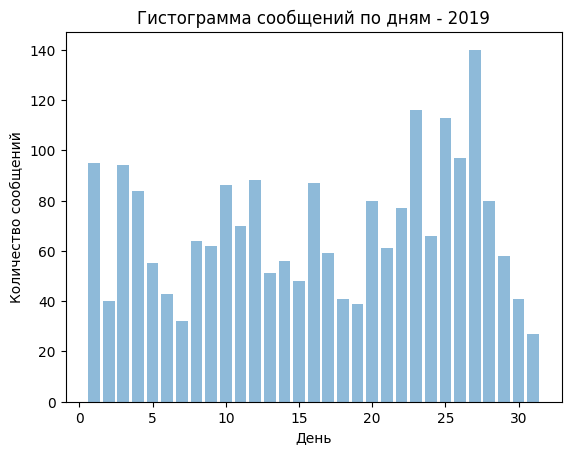

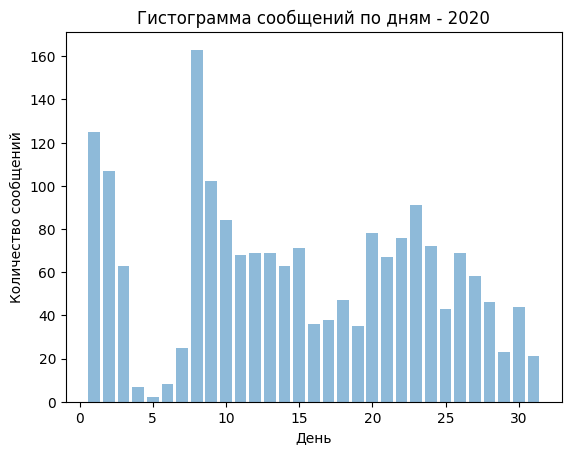

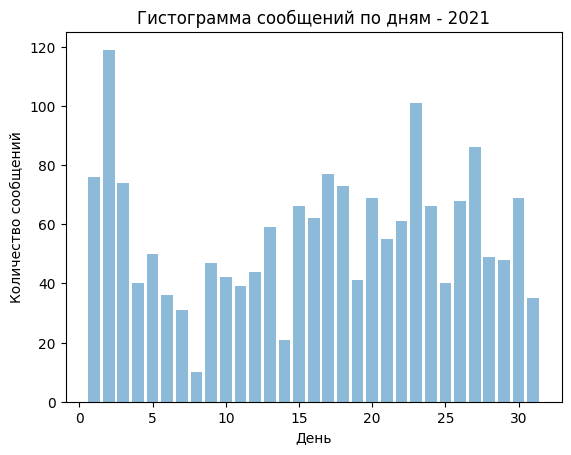

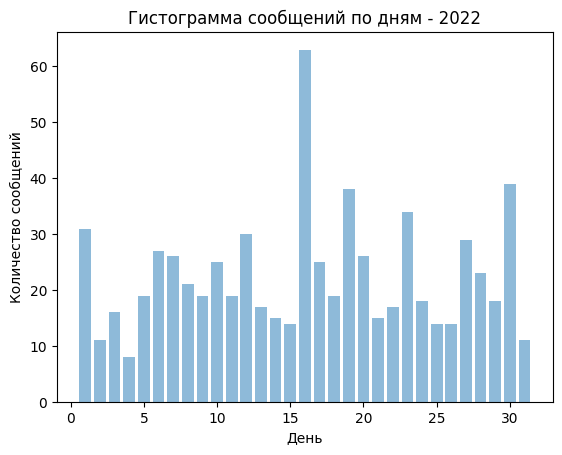

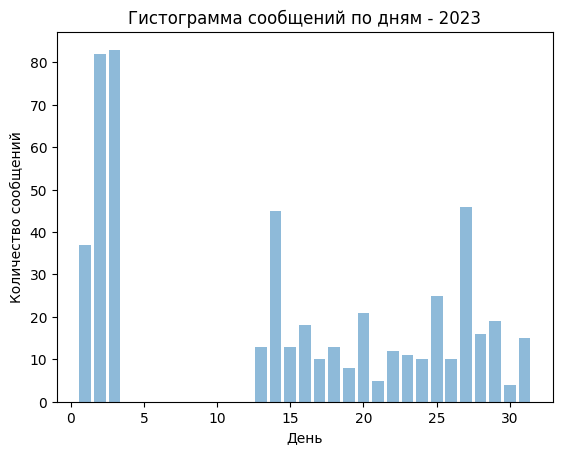

In [ ]:
# Извлечение дня и года из даты
data['День'] = data['Дата'].dt.day
data['Год'] = data['Дата'].dt.year

# Группировка данных по годам и дням
grouped_data = data.groupby(['Год', 'День']).size().reset_index(name='Количество сообщений')

# Создание гистограммы для каждого года
years = grouped_data['Год'].unique()
for year in years:
    year_data = grouped_data[grouped_data['Год'] == year]
    plt.figure()
    plt.bar(year_data['День'], year_data['Количество сообщений'], align='center', alpha=0.5)
    plt.xlabel('День')
    plt.ylabel('Количество сообщений')
    plt.title(f'Гистограмма сообщений по дням - {year}')
    plt.show()

In [ ]:
# Вычисление количества сообщений по годам
messages_by_year = data['Год'].value_counts().sort_index()

# Вывод количества сообщений по годам
for year, count in messages_by_year.iteritems():
    print(f'Год: {year}, Количество сообщений: {count}')

KeyError: ignored

In [ ]:
message_counts_by_date = data['Дата'].dt.date.value_counts()

# Определение дат с наибольшим количеством сообщений
max_message_count = message_counts_by_date.max()
dates_with_max_messages = message_counts_by_date[message_counts_by_date == max_message_count].index

# Вывод дат с наибольшим количеством сообщений
print('Даты с наибольшим количеством сообщений:')
for date in dates_with_max_messages:
    print(date)

Даты с наибольшим количеством сообщений:
2020-07-23


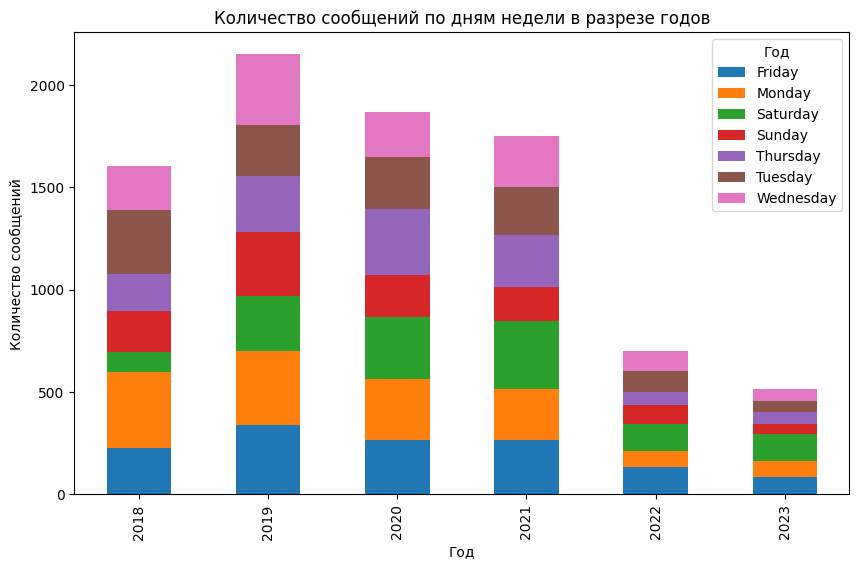

In [ ]:
# Извлечение года из столбца с датами
data['Год']= data['Дата'].dt.year

# Извлечение дня недели из столбца с датами
data['День недели'] = data['Дата'].dt.day_name()

# Группировка сообщений по годам и дням недели, подсчет количества сообщений
message_counts_by_year_day = data.groupby(['Год', 'День недели']).size().unstack()

# Построение графика
message_counts_by_year_day.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('Количество сообщений')
plt.title('Количество сообщений по дням недели в разрезе годов')
plt.legend(title='Год')
plt.show()

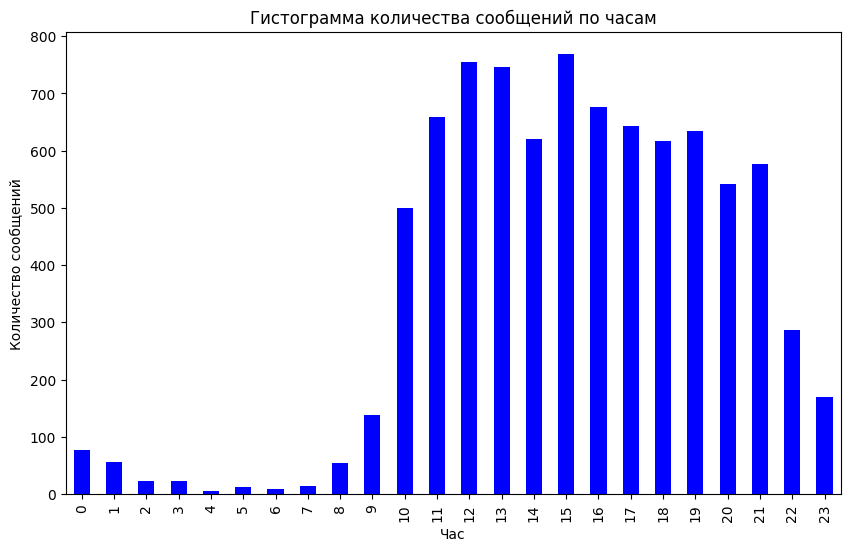

In [ ]:
data['Час'] = data['Дата'].dt.hour
# Группировка сообщений по часам, подсчет количества сообщений
message_counts_by_hour = data.groupby('Час').size()

# Построение гистограммы
plt.figure(figsize=(10, 6))
message_counts_by_hour.plot(kind='bar', color='blue')
plt.xlabel('Час')
plt.ylabel('Количество сообщений')
plt.title('Гистограмма количества сообщений по часам')
plt.show()



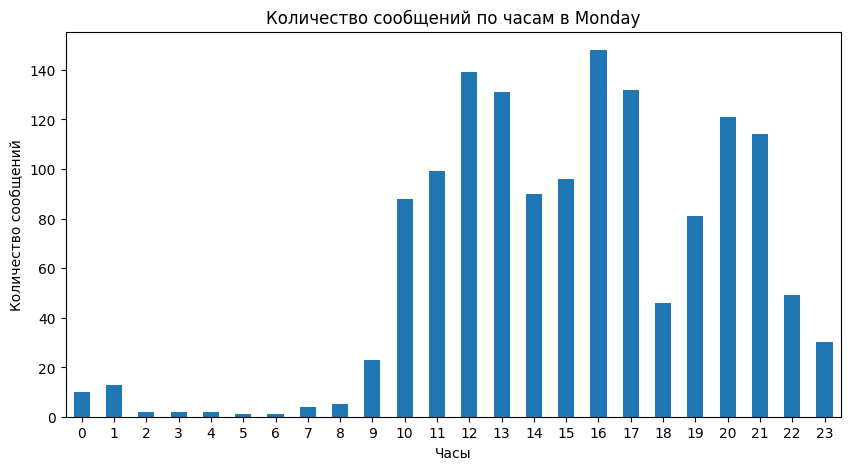

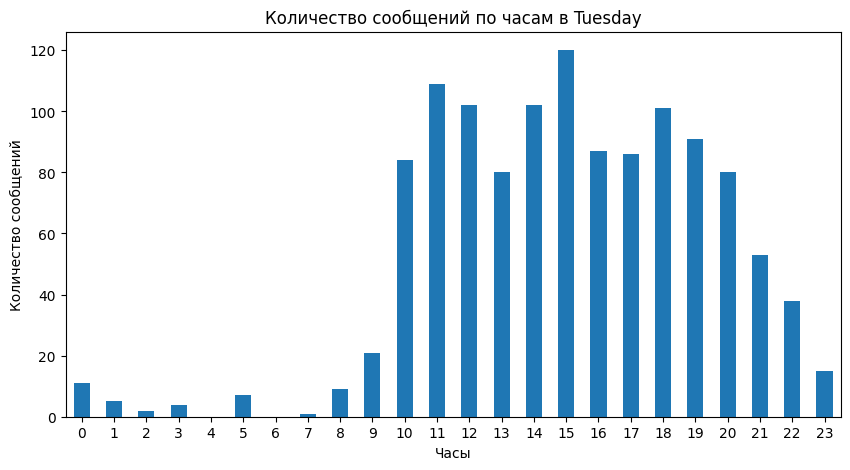

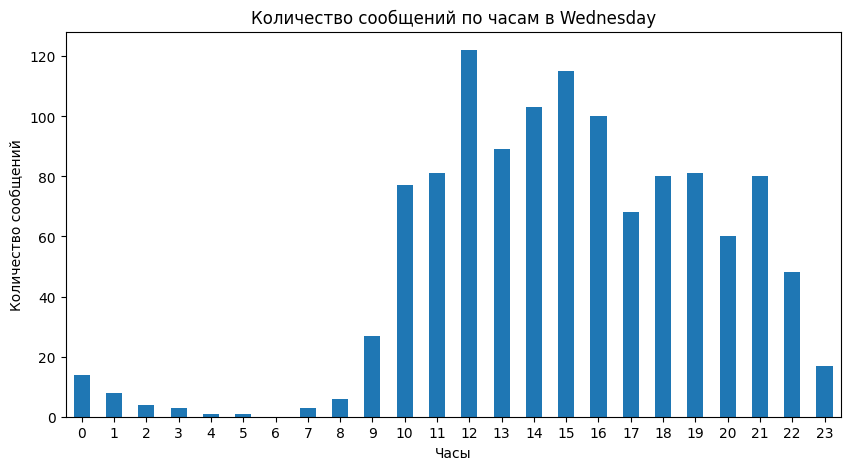

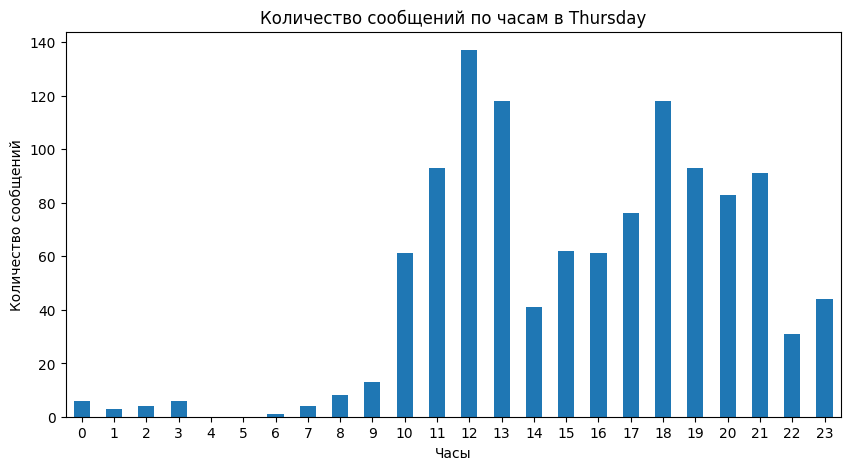

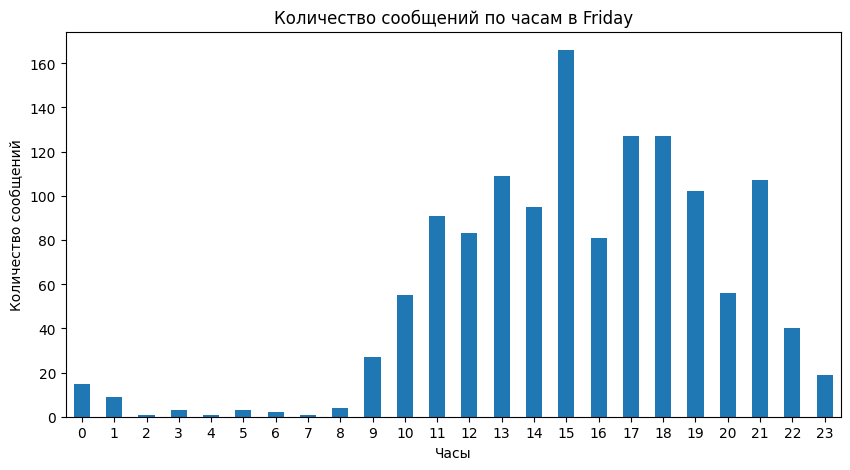

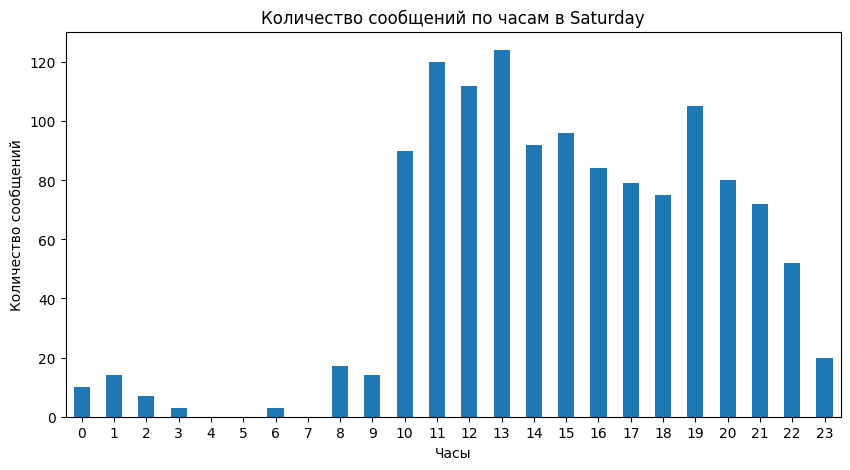

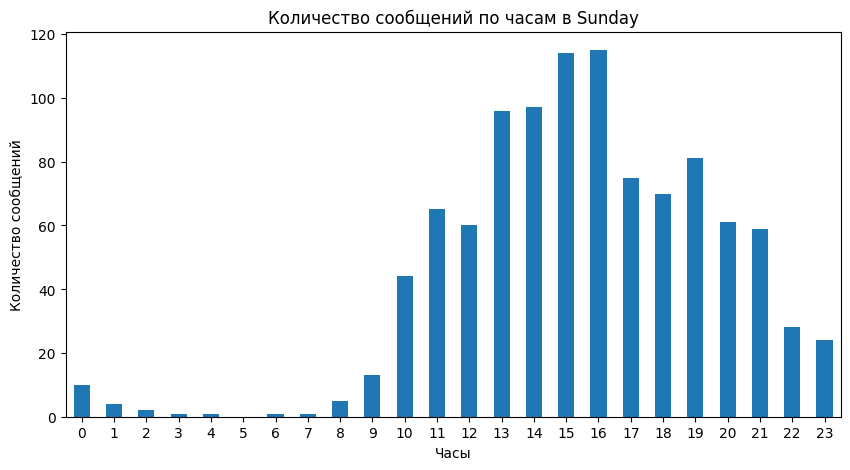

In [ ]:
# Группировка сообщений по дням недели и часам, подсчет количества сообщений
message_counts_by_weekday_hour = data.groupby(['День недели', data['Дата'].dt.hour]).size().unstack()

# Создание отдельных графиков для каждого дня недели
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for weekday in weekdays:
    # Получение данных только для текущего дня недели
    weekday_data = message_counts_by_weekday_hour.loc[weekday]

    # Построение графика
    plt.figure(figsize=(10, 5))
    weekday_data.plot(kind='bar')
    plt.xlabel('Часы')
    plt.ylabel('Количество сообщений')
    plt.title(f'Количество сообщений по часам в {weekday}')
    plt.xticks(rotation=0)
    plt.show()



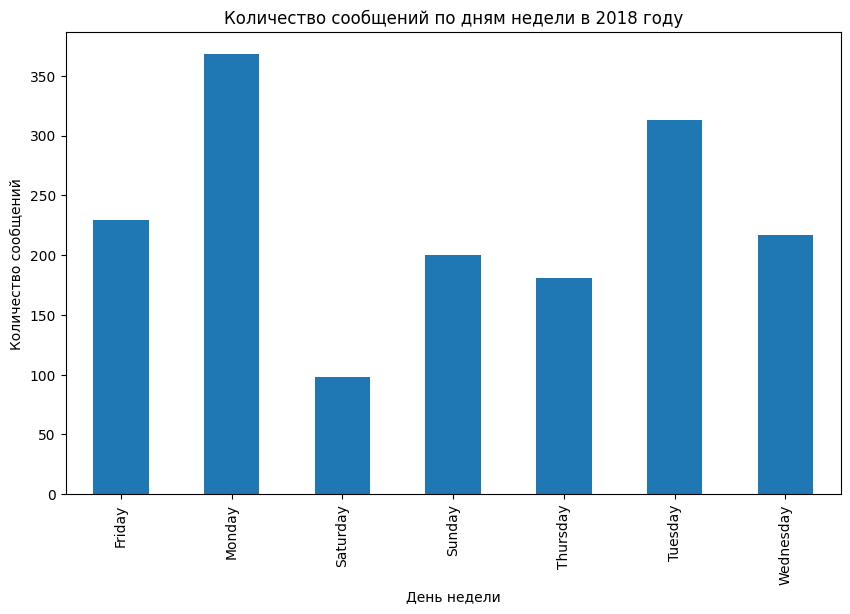

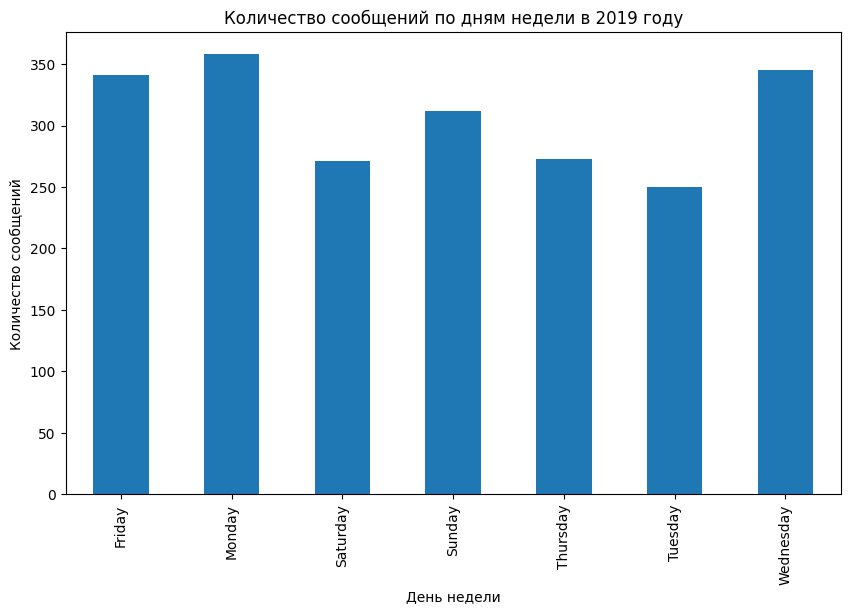

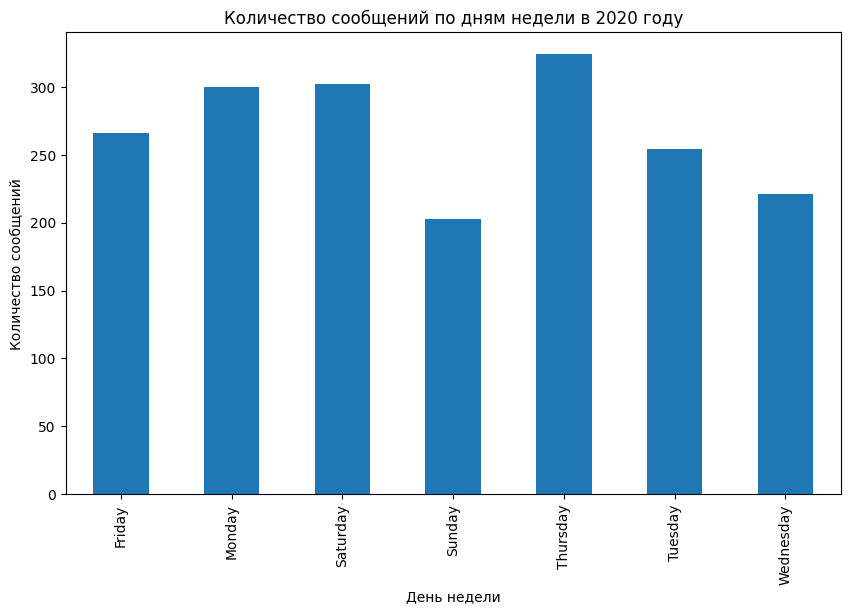

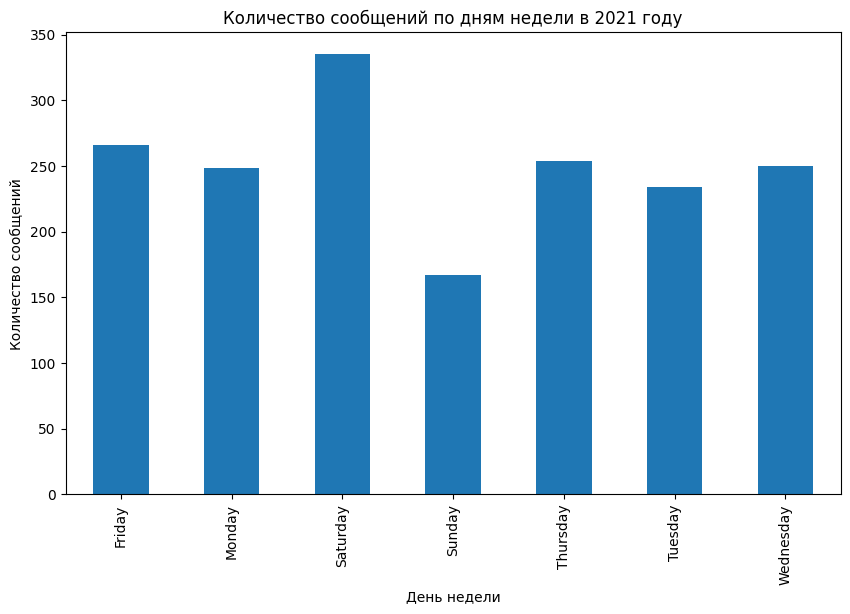

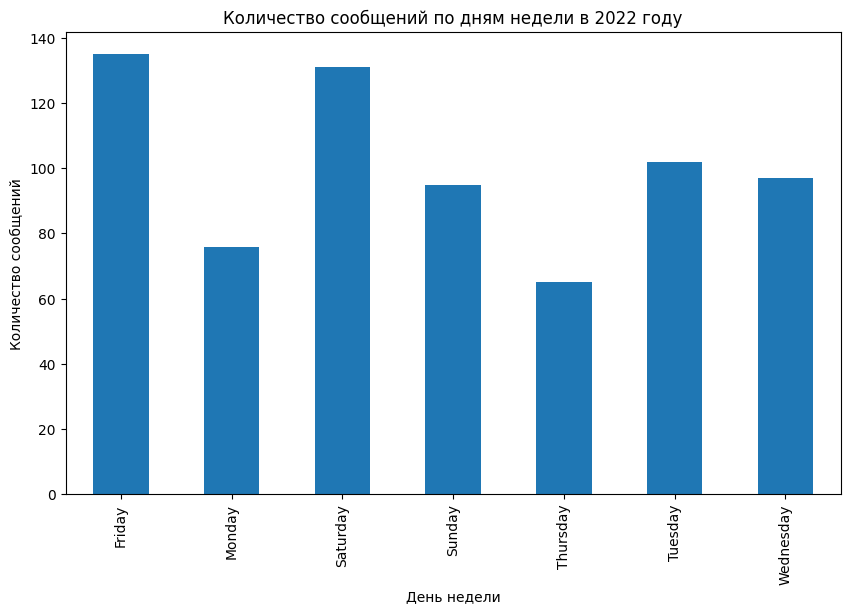

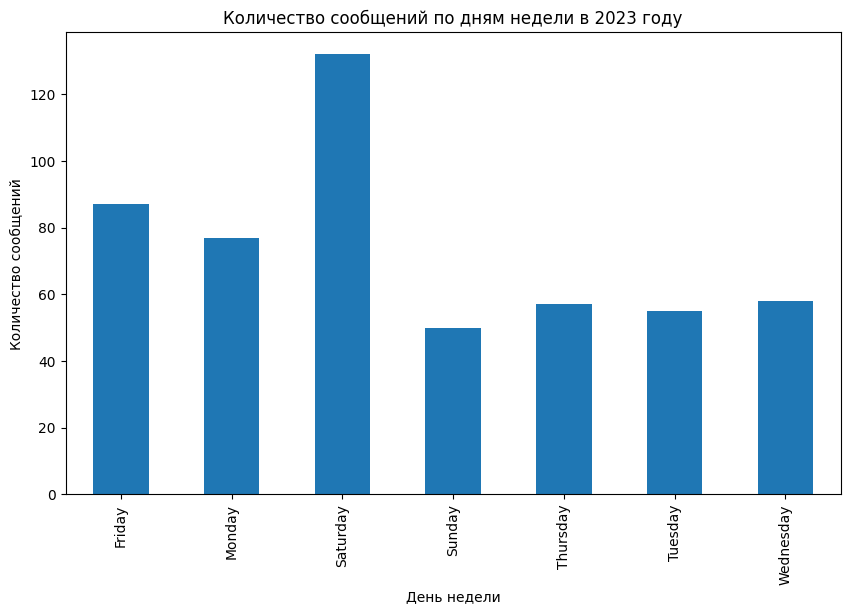

In [ ]:
# Извлечение года из столбца с датами
data['Год']= data['Дата'].dt.year

# Извлечение дня недели из столбца с датами
data['День недели'] = data['Дата'].dt.day_name()

# Построение графиков для каждого года
years = message_counts_by_year_day.index

for year in years:
    message_counts = message_counts_by_year_day.loc[year]
    message_counts.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('День недели')
    plt.ylabel('Количество сообщений')
    plt.title(f'Количество сообщений по дням недели в {year} году')
    plt.show()